In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

In [4]:
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('clear_data.csv')
train = pd.read_csv('train.csv')
X = data
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [13]:
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

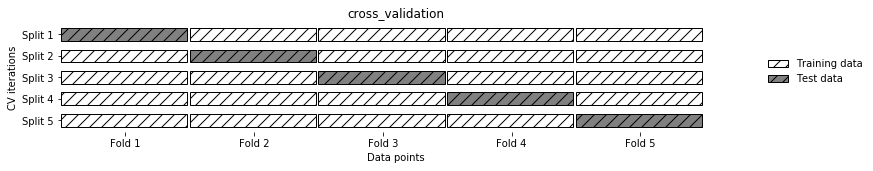

In [8]:
#交叉验证机制
Image('Snipaste_2020-01-05_16-37-56.png')

In [9]:
#交叉验证的模块
from sklearn.model_selection import cross_val_score

In [18]:
lr = LogisticRegression()
score = cross_val_score(lr, X_train, y_train, cv=10)  #cv表示几折
score

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

array([0.79104478, 0.71641791, 0.80597015, 0.73134328, 0.91044776,
       0.7761194 , 0.88059701, 0.7761194 , 0.81818182, 0.77272727])

In [19]:
score.mean()

0.7978968792401628

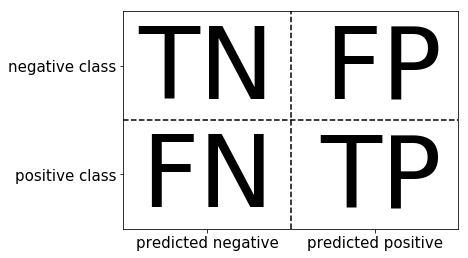

In [20]:
#混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

In [ ]:
#例子

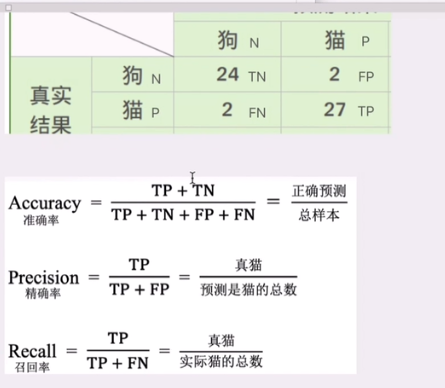

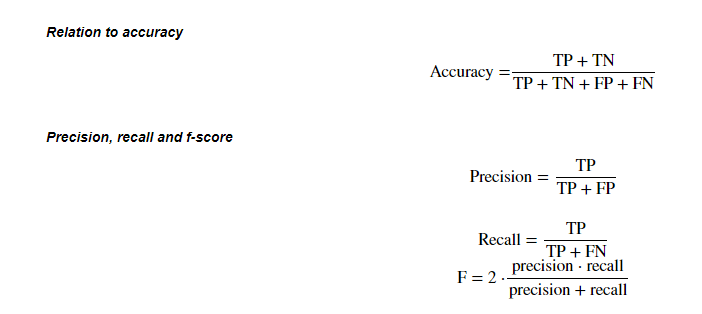

In [21]:
#准确率 (Accuracy),精确度（Precision）,Recall（召回率）,f-分数（精确度和召回率的调和平均数）计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

In [ ]:
#可视化表达

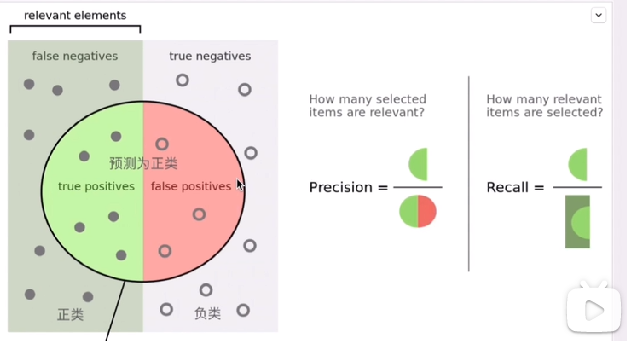

In [ ]:
#绿色：算术平均数 ；红色：调和平均数 ； 蓝色：几何平均数。

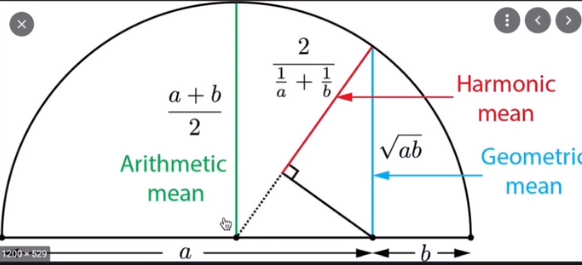

In [23]:
from sklearn.metrics import confusion_matrix     #混淆矩阵
from sklearn.metrics import classification_report

In [24]:
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [25]:
# 模型预测结果
pred = lr.predict(X_train)

In [26]:
# 混淆矩阵
confusion_matrix(y_train, pred)

array([[357,  55],
       [ 78, 178]], dtype=int64)

In [27]:
y_train.value_counts(),357+55,78+178

(0    412
 1    256
 Name: Survived, dtype: int64,
 412,
 256)

In [28]:
# 计算精确率、召回率以及f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       412
           1       0.76      0.70      0.73       256

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.79       668
weighted avg       0.80      0.80      0.80       668



In [29]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'TPR (recall)')

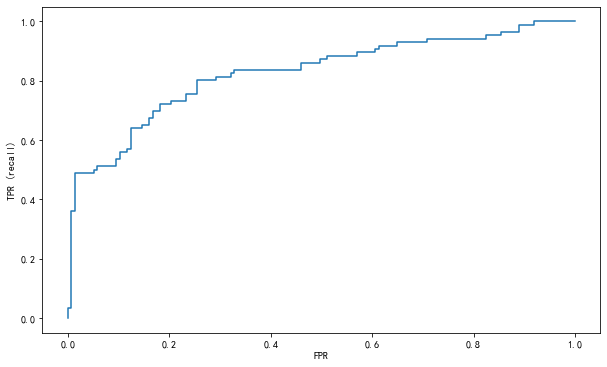

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

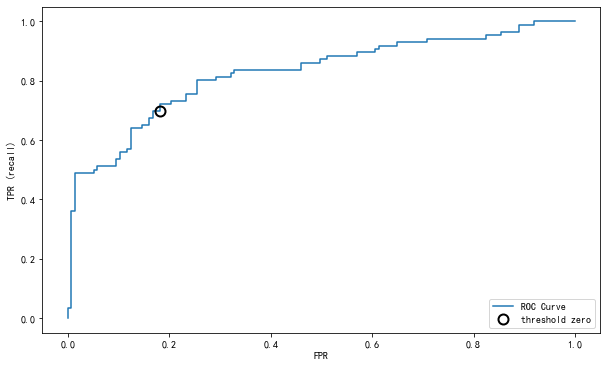

In [32]:
# 找到最接近于0的阈值
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

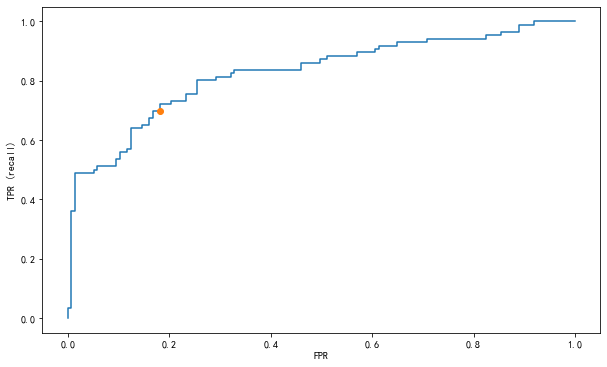

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))   #abs加绝对值，argmin找最靠近0的数
plt.plot(fpr[close_zero], tpr[close_zero], 'o')


In [34]:
from sklearn.metrics import plot_roc_curve

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

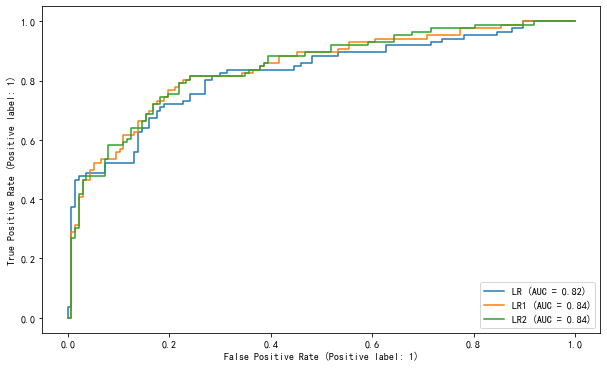

In [38]:
lr = LogisticRegression().fit(X_train, y_train)
lr1 = LogisticRegression(C=8).fit(X_train, y_train)
lr2 = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)

lr_display = plot_roc_curve(lr,X_test,y_test,name='LR',response_method ='decision_function')
plot_roc_curve(lr1,X_test,y_test,name='LR1',response_method ='decision_function',ax=lr_display.ax_)
plot_roc_curve(lr2,X_test,y_test,name='LR2',response_method ='decision_function',ax=lr_display.ax_)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated 

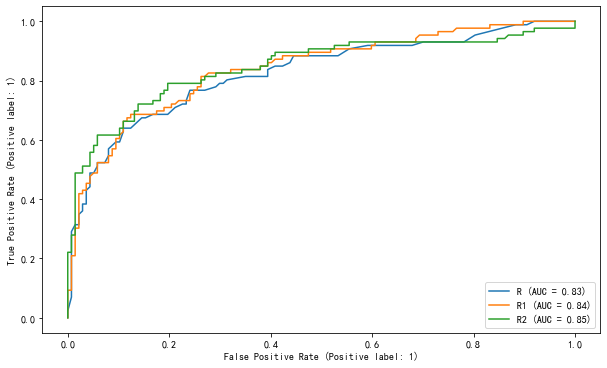

In [40]:
rf = RandomForestClassifier().fit(X_train, y_train)
rf1 = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
rf2 = RandomForestClassifier(n_estimators=100,max_depth=5).fit(X_train, y_train)

r_display = plot_roc_curve(rf,X_test,y_test,name='R',response_method ='predict_proba')
plot_roc_curve(rf1,X_test,y_test,name='R1',response_method ='predict_proba',ax=r_display.ax_)
plot_roc_curve(rf2,X_test,y_test,name='R2',response_method ='predict_proba',ax=r_display.ax_)